> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No-Show data set
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling


## Loading data

In [3]:
# Loading the data
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Invastegating all the dataset

In [4]:
# Date columns are objects while it have to be date time
# IDs need to be objects not int or float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Invastegating the duplicates

In [13]:
# we have 72607 appointments for same patients
print(sum(df.AppointmentID.duplicated()))
print(sum(df.PatientId.duplicated()))
print(sum(df.PatientId.duplicated(keep=False)))
# 24379 came to visit more than once
sum(df.PatientId.duplicated(keep=False))- sum(df.PatientId.duplicated())

0
48228
72607


24379

In [52]:
# some patients came so many times this needs to be invatgated
df[df.PatientId.duplicated(keep=False)].PatientId.value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
7.579746e+13    62
8.713749e+14    62
2.584244e+11    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
9.452745e+12    42
8.189452e+13    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
9.861628e+14    34
8.883500e+13    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
5.498952e+11     2
2.261812e+14     2
7.365750e+13     2
1.196424e+10     2
2.853998e+13     2
4.948765e+12     2
4.785563e+10     2
1.229354e+13     2
2.212167e+12     2
4.784995e+12     2
6.718329e+12     2
5.644129e+10     2
5.852188e+11     2
3.723555e+14     2
5.293766e+13     2
1.866179e+12     2
5.351566e+12     2
1.398553e+11     2
5.245713e+13     2
9.688818e+12     2
1.325358e+13     2
6.787818e+14

## Investegating the values in each column

In [14]:
df.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [15]:
df.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [16]:
# 2, 3, 4 these values need some investgation
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [17]:
df.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [18]:
df.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [19]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [20]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

# Data problems
- Date type
- IDs type
- duplicate patients
- 2,3,4 values in handcap column (this is for determining the level of handcap)

# Data Cleaning

## Data Type problem 

In [21]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_analysis = df.copy()

In [22]:
df_analysis['AppointmentDay'] = pd.to_datetime(df_analysis['AppointmentDay'])
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


In [23]:
df_analysis['ScheduledDay'] = pd.to_datetime(df_analysis['ScheduledDay'])
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [24]:
df_analysis['AppointmentID'] = df_analysis['AppointmentID'].apply(str)
print(df_analysis['AppointmentID'][0:5])
df_analysis.info()

0    5642903
1    5642503
2    5642549
3    5642828
4    5642494
Name: AppointmentID, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(4)
memory usage: 11.8+ MB


In [25]:
df_analysis['PatientId'] = df_analysis['PatientId'].map(str)
df_analysis['PatientId'] = df_analysis['PatientId'].str[:-2]
print(df_analysis['PatientId'][0:5])
df_analysis.info()

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


In [26]:
df['PatientId'][0]

29872499824296.0

## Patients duplication problem

In [27]:
#df_analysis[df_analysis.PatientId.duplicated(keep=False)][]
df_analysis.PatientId.value_counts()


822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
258424392677       62
871374938638855    62
75797461494159     62
66844879846766     57
872278549442       55
89239687393655     54
8435223536         51
853439686798559    50
14479974122994     46
65433599726992     46
9452745294842      42
81894521843749     42
188232341789524    40
2271579924275      38
9496196639835      38
13364929297498     37
1484143378533      35
88834999836575     34
986162815579582    34
712458866975343    33
416755661551767    30
6128878448536      30
81213966782532     29
8634164126317      24
36994987339512     23
                   ..
22952618282         1
898613254818263     1
46459669349448      1
71693652726975      1
2295122772422       1
6798934264418       1
82427882746132      1
67562482885519      1
91481834582371      1
93776582366323      1
827184683837634     1
5884136673941       1
419794754743        1
2595783957788       1
9949499346

In [28]:
x = df_analysis[df_analysis.PatientId=='822145925426128']
x['No-show'].value_counts()

No     87
Yes     1
Name: No-show, dtype: int64

In [29]:
x['ScheduledDay'].value_counts()

2016-05-18 11:46:54    1
2016-05-10 15:56:47    1
2016-05-09 11:35:55    1
2016-05-20 08:28:11    1
2016-05-18 08:13:00    1
2016-05-09 18:21:50    1
2016-05-25 08:48:46    1
2016-05-24 16:56:06    1
2016-05-24 11:08:07    1
2016-05-24 16:01:26    1
2016-06-03 09:58:43    1
2016-06-01 12:22:31    1
2016-05-13 11:53:41    1
2016-05-25 16:46:22    1
2016-05-04 11:38:34    1
2016-05-16 11:21:12    1
2016-06-02 10:10:28    1
2016-05-12 11:45:57    1
2016-05-06 16:29:48    1
2016-04-29 18:02:42    1
2016-05-12 08:43:08    1
2016-05-16 18:38:11    1
2016-05-03 16:57:59    1
2016-05-10 16:01:45    1
2016-06-01 08:44:35    1
2016-06-03 16:15:05    1
2016-05-17 15:56:37    1
2016-05-31 13:46:22    1
2016-05-05 08:36:48    1
2016-06-08 17:18:03    1
                      ..
2016-05-30 17:45:46    1
2016-05-02 17:57:36    1
2016-05-04 09:03:31    1
2016-05-13 18:09:14    1
2016-06-06 12:26:39    1
2016-05-09 09:05:43    1
2016-06-06 12:49:24    1
2016-05-13 14:26:40    1
2016-05-06 08:20:55    1


### Looks like it's just they are well following up with the hospital

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What is the difference between the number patients to show up to the number of not.

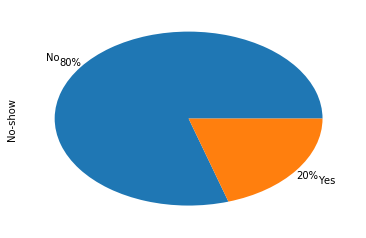

In [30]:
df_analysis['No-show'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

### From here we see that 20% of people didn't show up.

## Which 10 neibourhoods have the max patients?

The percentage is to the total patients in the best 10 not to the total number of patients


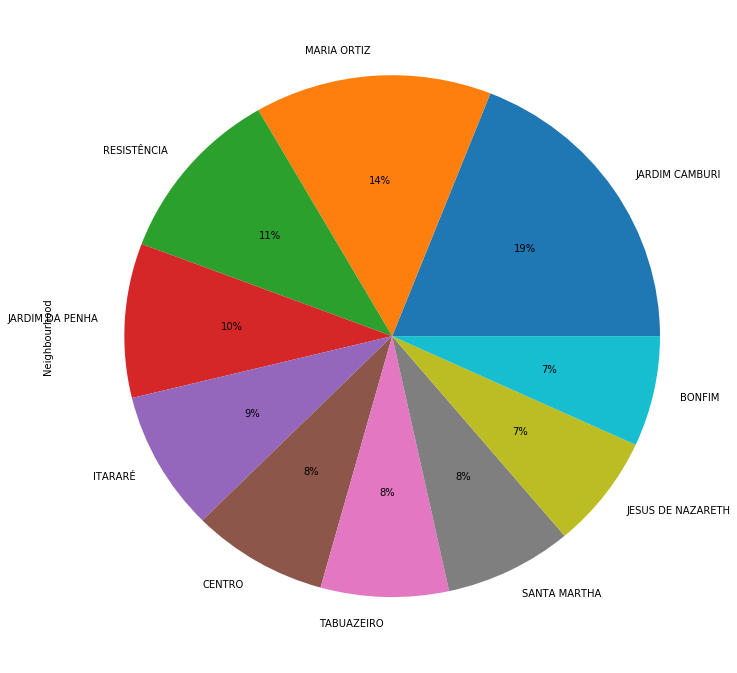

In [33]:
print('The percentage is to the total patients in the best 10 not to the total number of patients')
df_analysis['Neighbourhood'].value_counts()[:10].plot(kind='pie', figsize=(12,12), autopct='%1.0f%%');

In [49]:
print('the number of patients for the first 10 Neighbourhoods')
df.Neighbourhood.value_counts()[:10]

the number of patients for the first 10 Neighbourhoods


JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64

## Trying to get a correlations between the numeric data and the No-show column

In [34]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_analysis = df_analysis.sort_values(by='AppointmentDay')
df_analysis['No-show'].replace({'No': 0}, inplace=True)
df_analysis['No-show'].replace({'Yes': 1}, inplace=True)

In [35]:
df_analysis['Gender'].replace({'F': 0}, inplace=True)
df_analysis['Gender'].replace({'M': 1}, inplace=True)

In [36]:
df_show = df_analysis[df_analysis['No-show']==0]
df_no = df_analysis[df_analysis['No-show']==1]

In [37]:
df_analysis[df_analysis.Gender==1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
2151,725775968562,5521232,1,2016-03-29 11:09:08,2016-04-29,33,MARIA ORTIZ,0,0,0,0,0,1,0
2158,721453777155211,5523302,1,2016-03-29 16:38:24,2016-04-29,61,ANDORINHAS,0,0,0,0,0,1,0
2162,8663988812441,5520916,1,2016-03-29 10:41:45,2016-04-29,23,MARIA ORTIZ,0,0,0,0,0,1,0
2163,8522491877895,5642301,1,2016-04-29 15:32:32,2016-04-29,41,MARIA ORTIZ,0,0,0,0,0,0,0
2166,59356593744446,5641771,1,2016-04-29 14:18:12,2016-04-29,65,SÃO JOSÉ,0,1,1,1,0,0,0
2167,8736438635558,5598360,1,2016-04-19 07:30:37,2016-04-29,11,SÃO JOSÉ,0,0,0,0,0,0,0
2170,26672672127726,5587569,1,2016-04-15 08:49:39,2016-04-29,3,SÃO JOSÉ,0,0,0,0,0,1,0
2149,17118993243182,5521211,1,2016-03-29 11:05:45,2016-04-29,32,MARIA ORTIZ,0,0,0,0,0,1,1
2128,33742381214747,5639569,1,2016-04-29 09:14:40,2016-04-29,47,JESUS DE NAZARETH,0,0,0,0,0,0,0
2138,173774114889778,5551045,1,2016-04-06 13:12:28,2016-04-29,37,JESUS DE NAZARETH,0,0,0,0,0,0,1


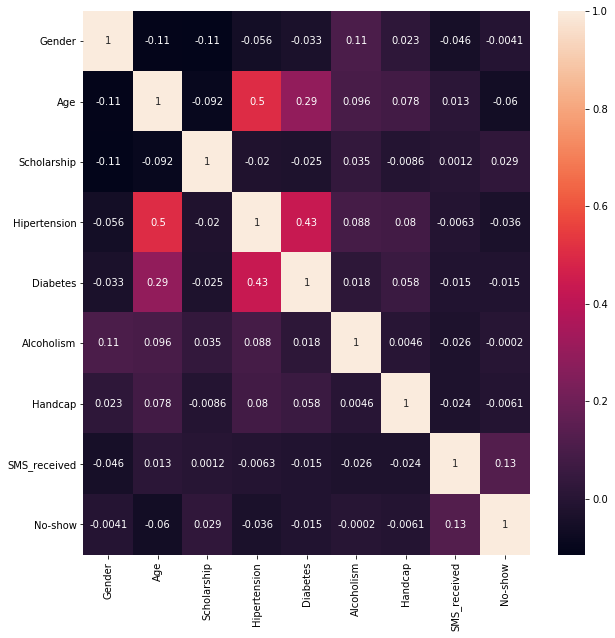

In [86]:
correlation = df_analysis.drop(columns=['ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'PatientId', 'AppointmentID'])
plt.figure(figsize=(10, 10))
sns.heatmap(correlation.corr(), annot=True)

## Which neigbourhood has higher rate of showing up? And which has the lowest?

In [38]:
x=(df_show.Neighbourhood.value_counts().sort_index()/df_analysis.Neighbourhood.value_counts().sort_index())

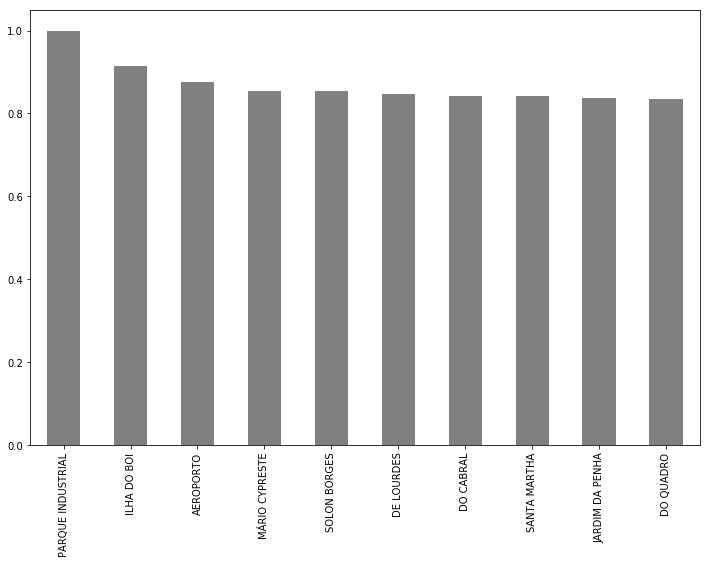

In [39]:
x.nlargest(10).plot(kind='bar', figsize=(12,8), color='grey')

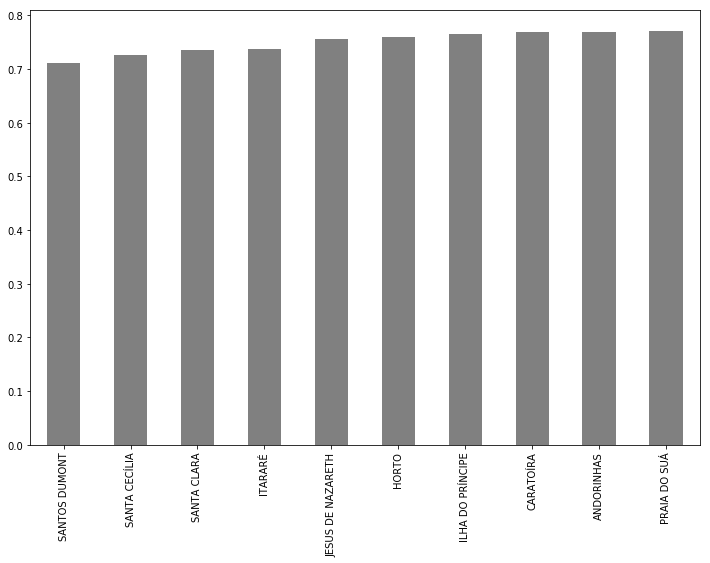

In [40]:
x.nsmallest(10).plot(kind='bar', figsize=(12,8), color='grey')

In [51]:
x.nlargest(10)

PARQUE INDUSTRIAL    1.000000
ILHA DO BOI          0.914286
AEROPORTO            0.875000
MÁRIO CYPRESTE       0.854447
SOLON BORGES         0.852878
DE LOURDES           0.845902
DO CABRAL            0.842857
SANTA MARTHA         0.841584
JARDIM DA PENHA      0.837245
DO QUADRO            0.835100
Name: Neighbourhood, dtype: float64

<a id='conclusions'></a>
## Conclusions

Now we answered 3 questions after cleaning some datatype problems and investegatin the duplicates.

The 3 questions were. 
what's the number of patients who showed up to not showing up which was 80% to 20%. 
What're the first maximum neighbourhoods in patients and found that the ranking is:
- JARDIM CAMBURI,                 7717
- MARIA ORTIZ,                    5805
- RESISTÊNCIA,                    4431
- JARDIM DA PENHA,                3877
- ITARARÉ,                        3514
- CENTRO,                         3334
- TABUAZEIRO,                     3132
- SANTA MARTHA,                   3131
- JESUS DE NAZARETH,              2853
- BONFIM,                         2773

Next was the showing up rate per Neighbourhood and found that:
- PARQUE INDUSTRIAL,    1.000000
- ILHA DO BOI,   0.914286
- AEROPORTO,            0.875000
- MÁRIO CYPRESTE,       0.854447
- SOLON BORGES,         0.852878
- DE LOURDES,           0.845902
- DO CABRAL,            0.842857
- SANTA MARTHA,         0.841584
- JARDIM DA PENHA,      0.837245
- DO QUADRO,            0.835100

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0